# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Moch Hikmal Abrar
- **Email:** m134b4ky2516@bangkit.academy
- **ID Dicoding:** hikmal223

## Menentukan Pertanyaan Bisnis

- Apa saja 5 kota yang menjadi seller tertinggi ?
- Bagaimana urutan perbandingan persentase penggunaan
  pembayaran yang paling sering digunakan dan sedikit ?

## Import Semua Packages/Library yang Digunakan

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [107]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [108]:
payments_df = pd.read_csv("/content/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- The dataset includes sellers from various cities and
  states, with SP (São Paulo) appearing frequently. Analyzing the distribution of sellers by state and city can provide insights into where the majority of sellers are located.
- In the provided data, all entries use the credit_card
  payment method. This suggests a strong preference or reliance on credit card payments in the dataset. If this trend holds for the entire dataset, it could indicate a need to explore other payment options.

### Assessing Data

#Assessing Data Sellers


In [109]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [110]:
sellers_df.isna().sum()


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [111]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#Assessing Data Payment

In [112]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [113]:
payments_df.isna().sum()


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [114]:
print("Jumlah duplikasi: ",payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- The DataFrame contains 3,095 entries (rows), representing individual sellers.

- The DataFrame contains 103,886 entries (rows), indicating  
  a substantial dataset, which likely represents multiple payment transactions.

### Cleaning Data

In [115]:
# Standardize city and state names
sellers_df['seller_city'] = sellers_df['seller_city'].str.strip().str.title()
sellers_df['seller_state'] = sellers_df['seller_state'].str.strip().str.upper()

# Check for valid zip code prefixes
invalid_zip_codes = sellers_df[(sellers_df['seller_zip_code_prefix'] < 1000) | (sellers_df['seller_zip_code_prefix'] > 99999)]
print("Invalid Zip Codes:\n", invalid_zip_codes)

# Create a new feature for capital cities
sellers_df['is_capital'] = sellers_df['seller_city'].isin(['Brasília', 'São Paulo', 'Rio De Janeiro'])

# Descriptive statistics for zip code prefixes
print(sellers_df['seller_zip_code_prefix'].describe())

# Save the cleaned data
sellers_df.to_csv('/content/cleaned_sellers_dataset.csv', index=False)



Invalid Zip Codes:
 Empty DataFrame
Columns: [seller_id, seller_zip_code_prefix, seller_city, seller_state]
Index: []
count     3095.000000
mean     32291.059451
std      32713.453830
min       1001.000000
25%       7093.500000
50%      14940.000000
75%      64552.500000
max      99730.000000
Name: seller_zip_code_prefix, dtype: float64


In [116]:

# Check for logical errors in installments and payment values
zero_installments = payments_df[payments_df['payment_installments'] == 0]
print("Zero Installments:\n", zero_installments)

negative_values = payments_df[payments_df['payment_value'] < 0]
print("Negative Payment Values:\n", negative_values)

# Outlier detection for payment_value
Q1 = payments_df['payment_value'].quantile(0.25)
Q3 = payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1
outliers = payments_df[(payments_df['payment_value'] < (Q1 - 1.5 * IQR)) | (payments_df['payment_value'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

# Standardize payment_type
payments_df['payment_type'] = payments_df['payment_type'].str.strip().str.title()

# Create a new feature for installments
payments_df['is_installment'] = payments_df['payment_installments'] > 0

# Save the cleaned data
payments_df.to_csv('/content/cleaned_order_payments_dataset.csv', index=False)


Zero Installments:
                                order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94  
Negative Payment Values:
 Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []
Outliers:
                                 order_id  payment_sequential payment_type  \
23      4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
26      d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
52      2e2c60b99754ae1e4d8b18846cfec9f2                   1  credit_card   
54      95442deb81a5d91c97c0df96b431634a                   1       boleto   
61      3ab4eea6776259ae8dfbabaeffece352                   1  credit_card   


**Insight:**
- The output shows that there are no invalid zip codes in  
  the dataset, as indicated by the empty DataFrame for "Invalid Zip Codes". This is a positive sign, suggesting that all zip codes present are valid and conform to the expected format.
- There are no negative payment values in the dataset. This
  is a positive sign, as it indicates that all recorded payments are valid, further reinforcing the integrity of the dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [117]:
sellers_df.describe(include="all")



,seller_id,seller_zip_code_prefix,seller_city,seller_state,is_capital
count,3095,3095.000000,3095,3095,3095
unique,3095,NaN,611,23,2
top,3442f8959a84dea7ee197c632cb2df15,NaN,Sao Paulo,SP,False
freq,1,NaN,694,1849,2999
mean,NaN,32291.059451,NaN,NaN,NaN
std,NaN,32713.453830,NaN,NaN,NaN
min,NaN,1001.000000,NaN,NaN,NaN
25%,NaN,7093.500000,NaN,NaN,NaN
50%,NaN,14940.000000,NaN,NaN,NaN
75%,NaN,64552.500000,NaN,NaN,NaN


In [118]:
city_counts = sellers_df['seller_city'].value_counts().reset_index()
city_counts.columns = ['seller_city', 'num_sellers']

# Display the top cities with the most sellers
top_cities = city_counts.head(10)
print(top_cities)

      seller_city  num_sellers
0       Sao Paulo          694
1        Curitiba          127
2  Rio De Janeiro           96
3  Belo Horizonte           68
4  Ribeirao Preto           52
5       Guarulhos           50
6        Ibitinga           49
7     Santo Andre           45
8        Campinas           41
9         Maringa           40


In [119]:

payment_counts = payments_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']
print(payment_counts)

  payment_type  count
0  Credit_Card  76795
1       Boleto  19784
2      Voucher   5775
3   Debit_Card   1529
4  Not_Defined      3


**Insight:**
- São Paulo stands out significantly with 694 sellers,  
  making it the leading city by a large margin. This suggests a robust market presence and likely indicates high demand or extensive business activity in this metropolitan area.
- Credit Card is the most popular payment method, with 76,
  795 transactions. This suggests that consumers prefer the convenience and security associated with credit card transactions, making it a dominant payment method in the dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

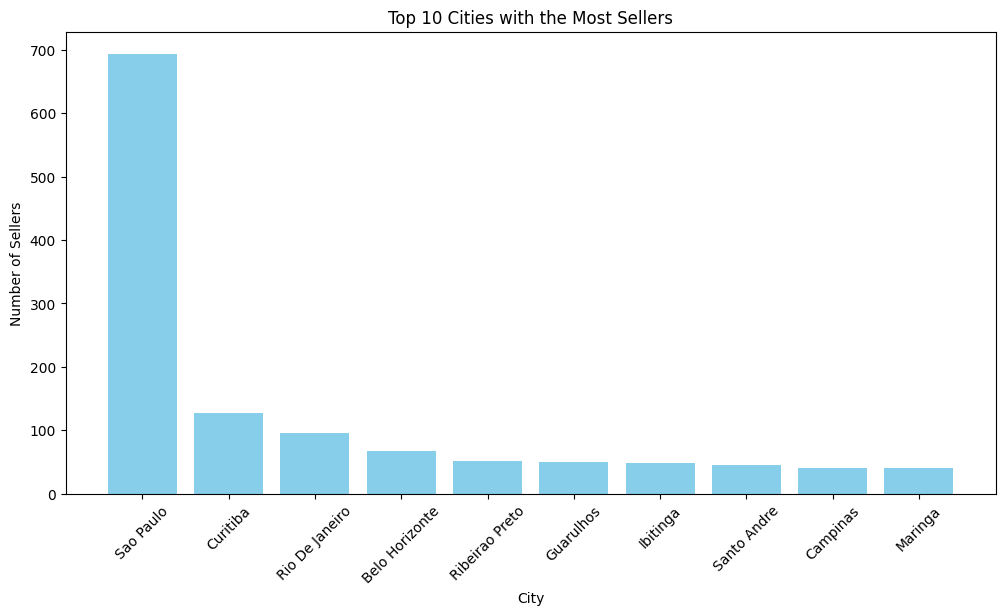

In [120]:

# Vizualization
plt.figure(figsize=(12, 6))
plt.bar(city_seller_counts_df['seller_city'].head(10), city_seller_counts_df['num_sellers'].head(10), color='skyblue')
plt.title('Top 10 Cities with the Most Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:

<ipython-input-121-6c0c5dc86b6c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_percentage, x='payment_type', y='percentage', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

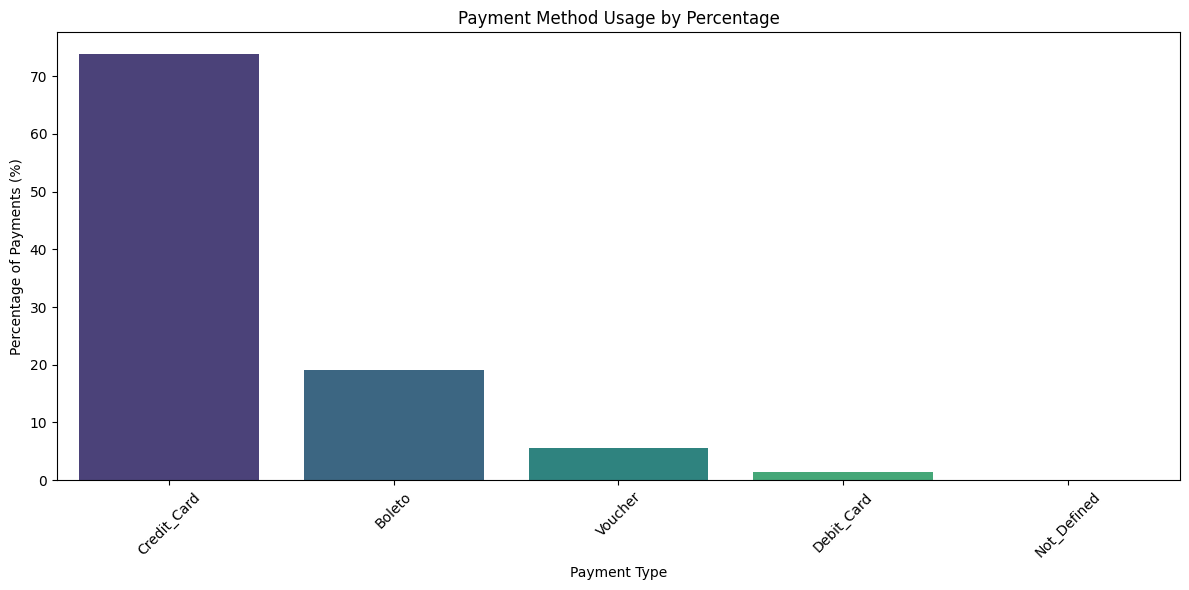

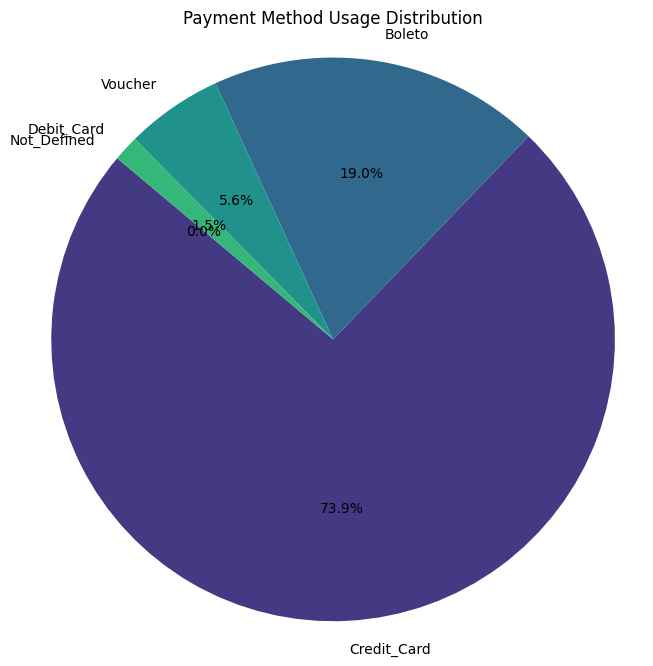

In [121]:
# Load the cleaned payments dataset
payments_df = pd.read_csv('/content/cleaned_order_payments_dataset.csv')

# Count the occurrences of each payment type
payment_counts = payments_df['payment_type'].value_counts()

# Calculate the percentage of each payment type
payment_percentage = (payment_counts / payment_counts.sum()) * 100
payment_percentage = payment_percentage.reset_index()
payment_percentage.columns = ['payment_type', 'percentage']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=payment_percentage, x='payment_type', y='percentage', palette='viridis')

# Customize the plot
plt.title('Payment Method Usage by Percentage')
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Payments (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Set the figure size for the pie chart
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(payment_percentage['percentage'], labels=payment_percentage['payment_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(payment_percentage)))

# Customize the plot
plt.title('Payment Method Usage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.show()

**Insight:**
- The bar chart effectively compares the number of sellers
  across the top 10 cities. This allows for quick visual identification of which cities dominate in terms of seller presence.
- The bar plot displays the percentage of each payment type
  used in transactions. This allows for straightforward comparison of how frequently each payment method is utilized.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
  Pada hasil visualisasi di dapatkan jumlah kota dengan seller terbanyak yakni kota Sao Paolo dengan jumlah seller sebanyak 694.


- Conclution pertanyaan 2
  Urutan perbandingan persentase penggunaaan payment yang paling sering dan paling sedikit:
  1. Credit Card = 73.9%
  2. Boleto = 19.0%
  3. Vouche = 5.6 %
  4. Debit Card = 1.5 %
  5. Not Defined = 0
